In [1]:
library(ArchR)
library(org.Ss.eg.db)
library(SuscrofaTxdb.11.108.july)
library(dplyr)
library(viridis)
library(ggseqlogo)
library(cowplot)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [3]:
addArchRThreads(1)

Setting default number of Parallel threads to 1.



In [4]:
load(file = "/home/adufour/work/rds_storage/omics/archr_all_v7_embryo.RData")

In [33]:
motifs <- c("swissregulon__hs__GTF2I")
markerMotifs <- getFeatures(archrproj_sub, select = paste(motifs, collapse="|"), useMatrix = "MotifMatrix")
markerMotifs

[1] "z:None swissregulon__hs__GTF2I"         
[2] "deviations:None swissregulon__hs__GTF2I"

In [34]:
markerMotifs <- grep("z:", markerMotifs, value = TRUE)

In [35]:
p4 <- plotEmbedding(
    ArchRProj = archrproj_sub, 
    colorBy = "MotifMatrix", 
    name = markerMotifs,
    plotAs = "points",
    embedding = "UMAP_Harmony"
)

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3c709d6a237d60-Date-2024-01-25_Time-11-08-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = MotifMatrix

Getting Matrix Values...

2024-01-25 11:08:43 : 

1 
2 
3 
4 
5 
6 
7 


Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3c709d6a237d60-Date-2024-01-25_Time-11-08-34.log



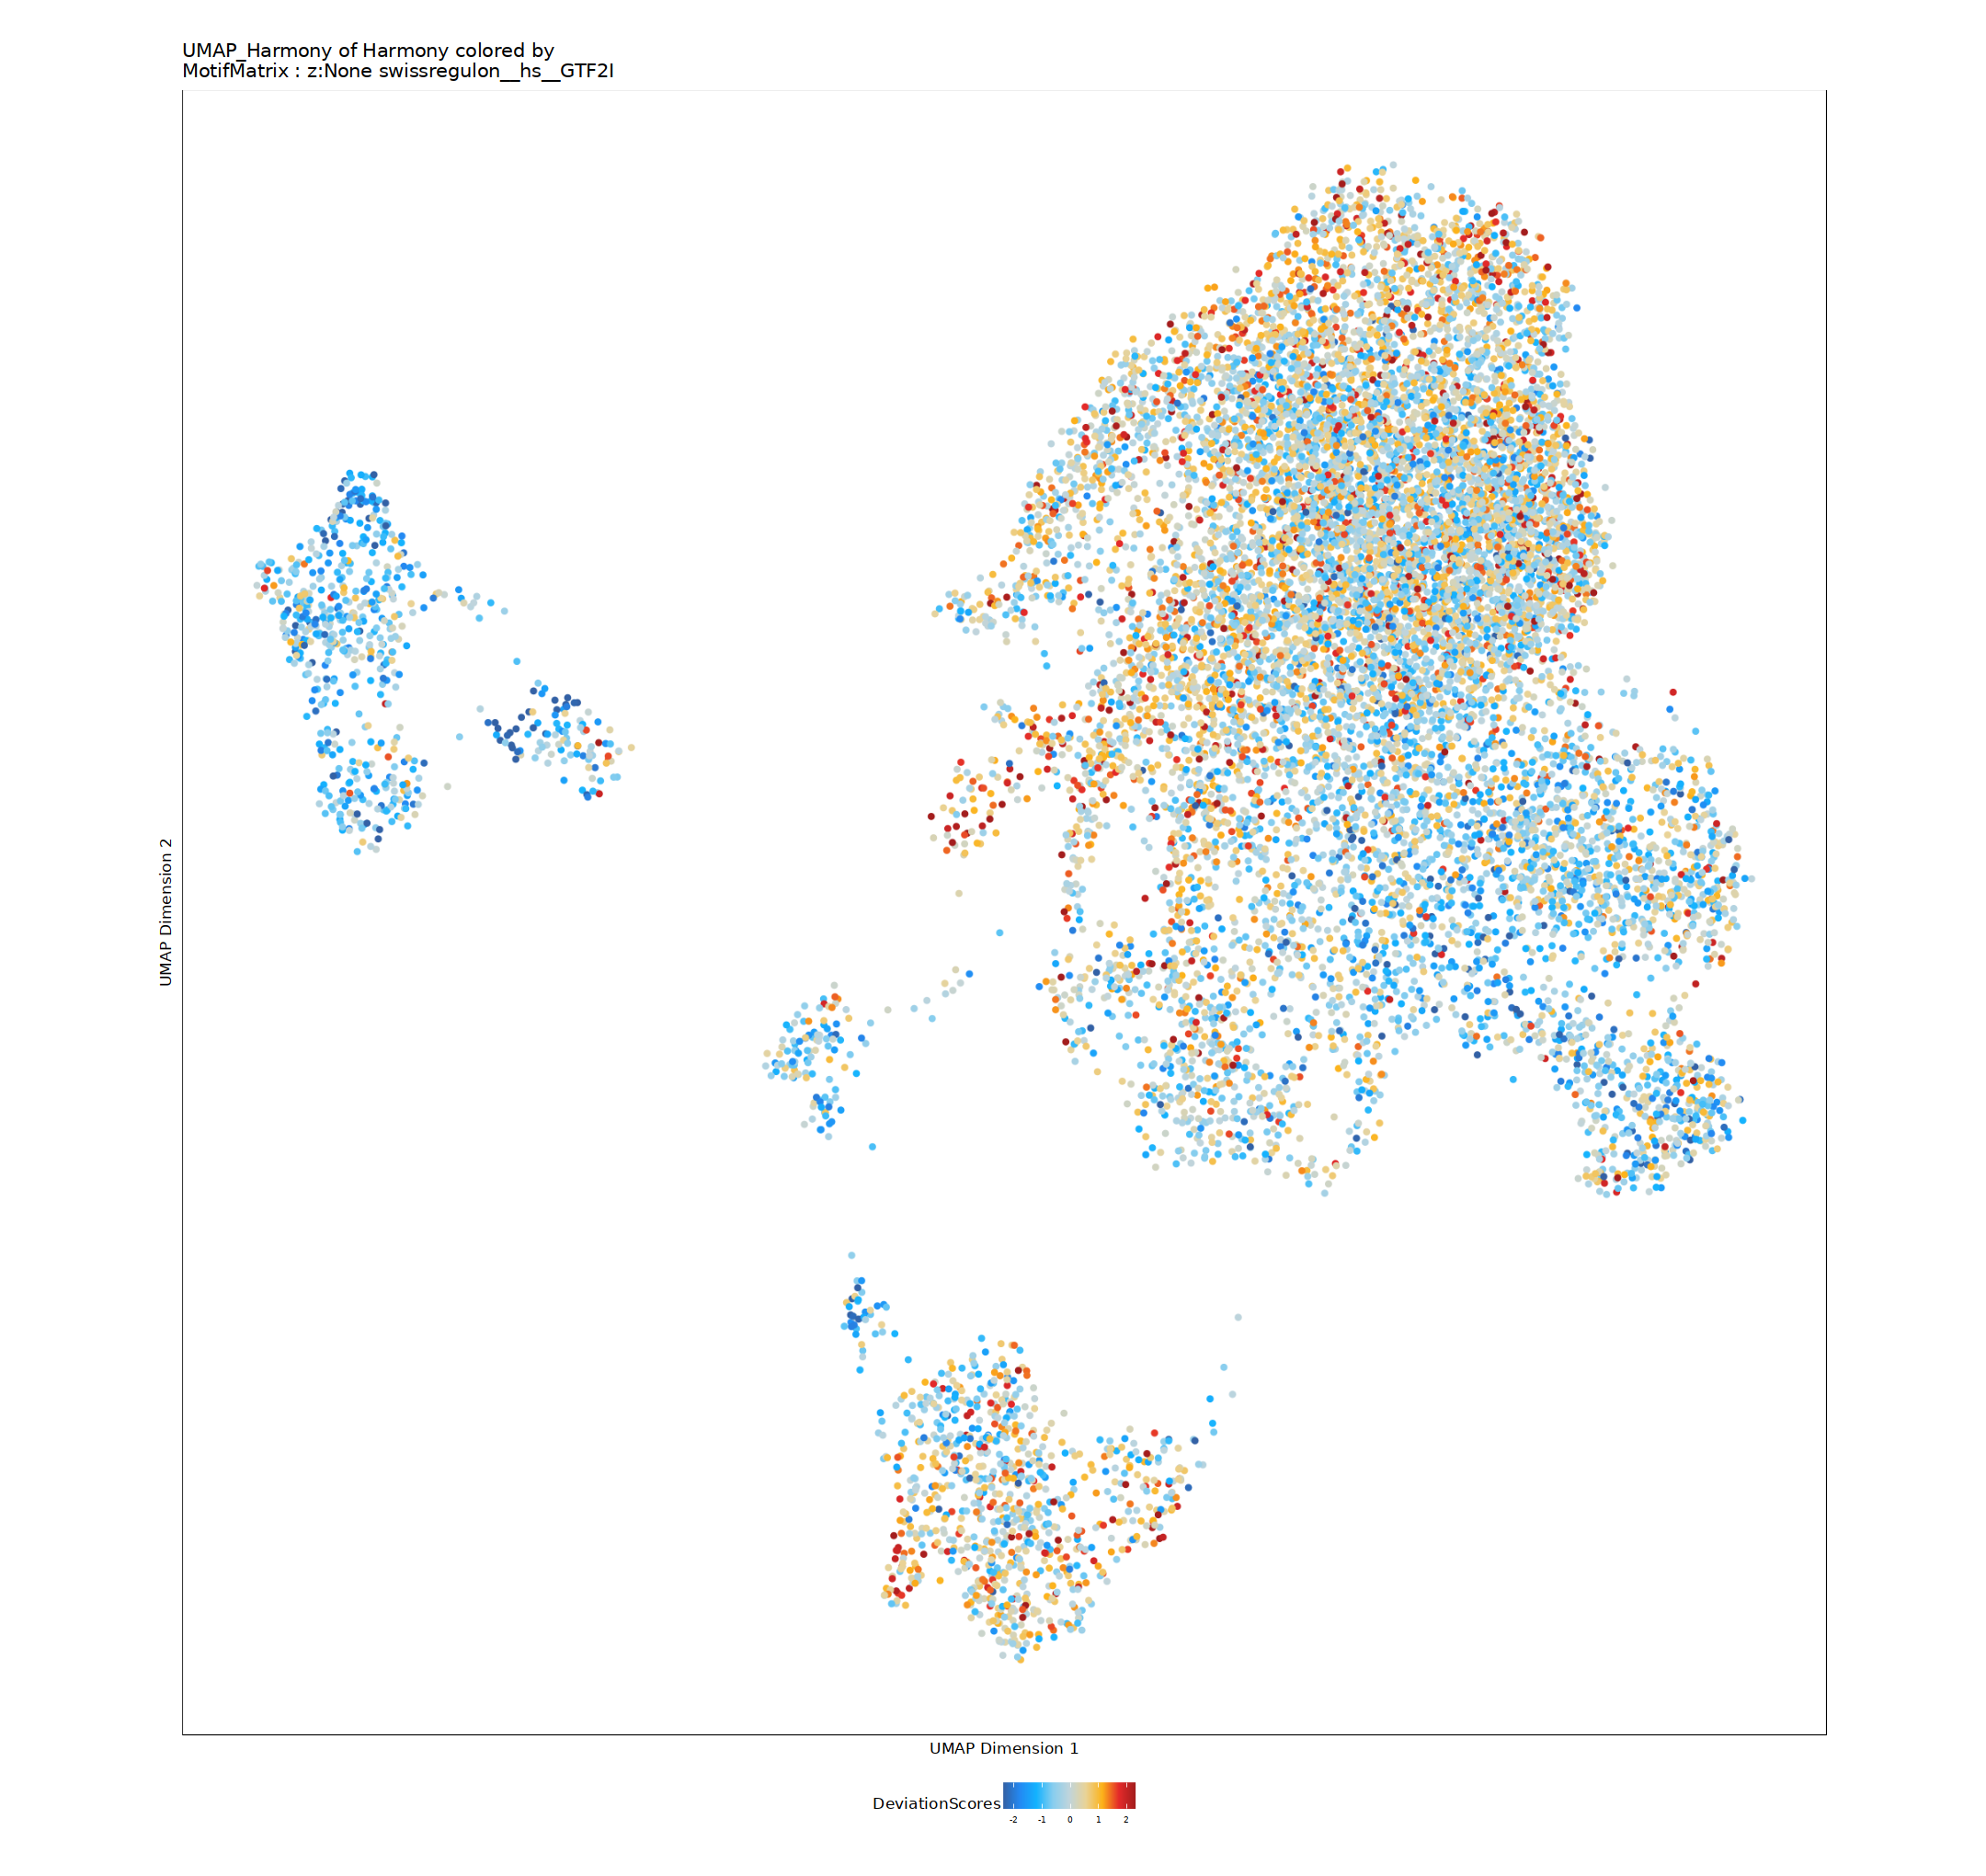

In [36]:
p4

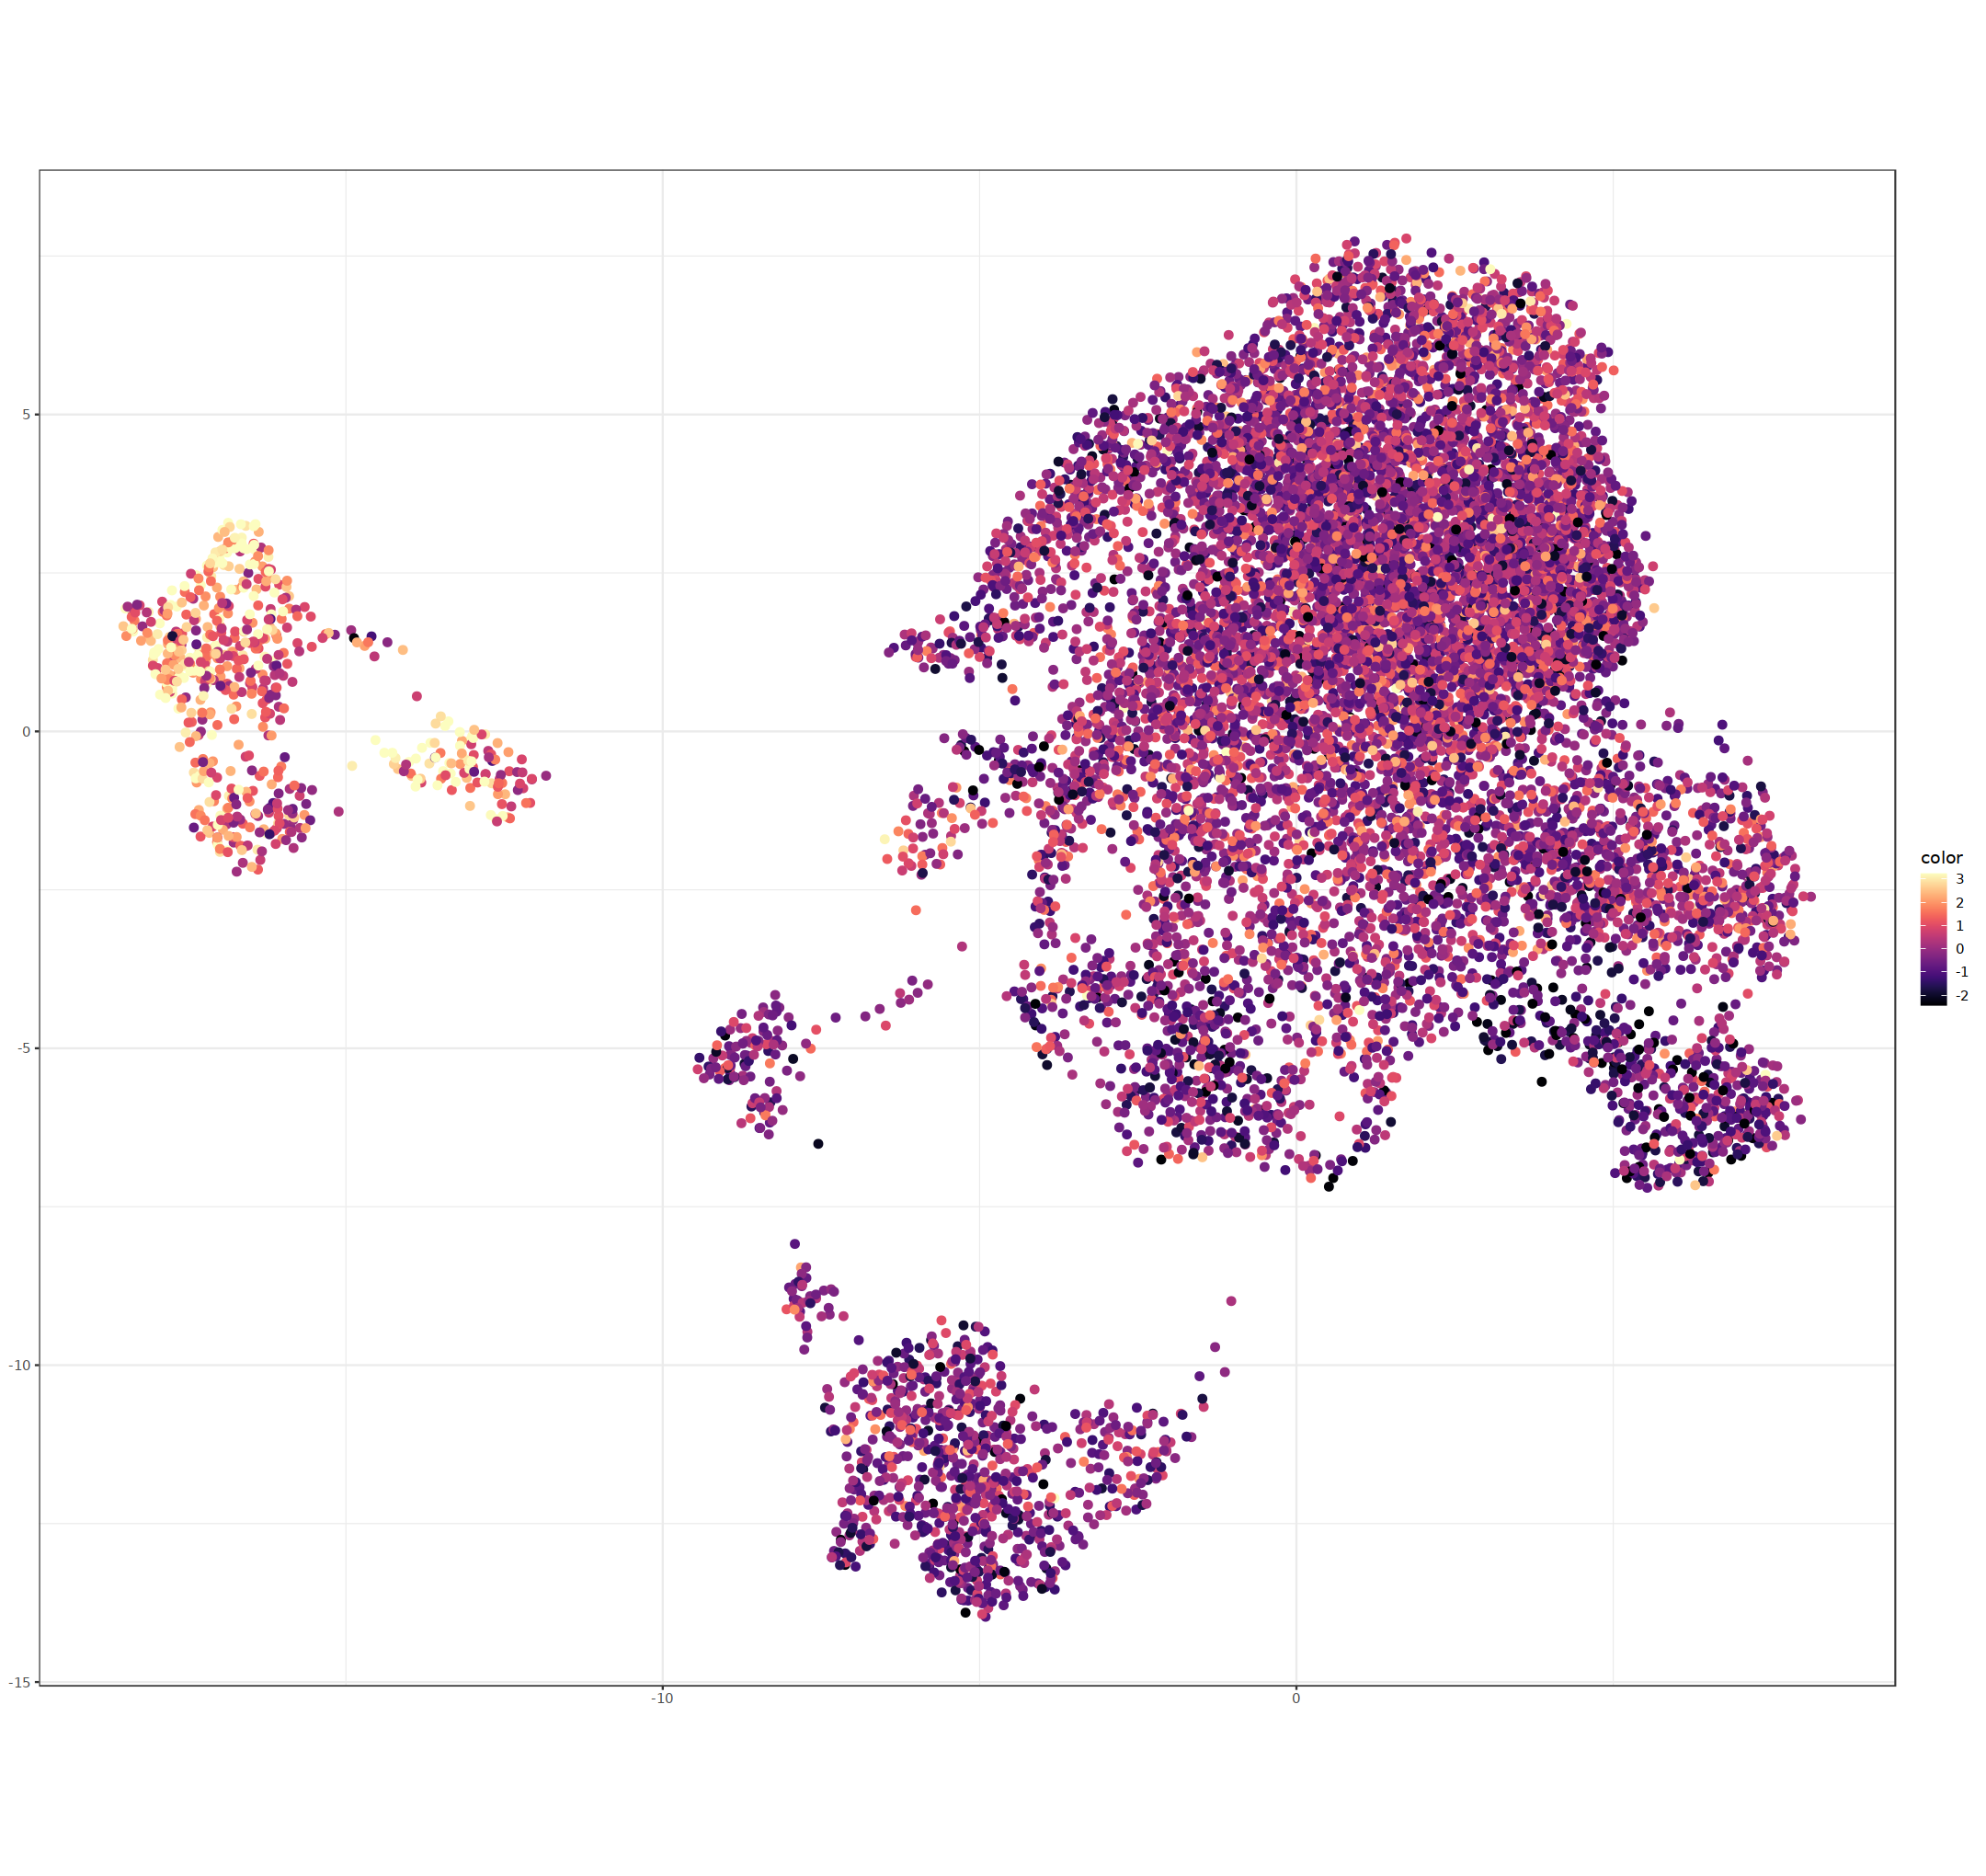

In [17]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = p4$data$x,
    UMAP_2 = p4$data$y,
    color = p4$data$color
  ) %>%
  group_by(color) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

plot_nanog <- p4$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  theme_bw() +
  #expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_viridis(option = "A") +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank()) +
  coord_fixed()

plot_nanog

In [18]:
motif <- t(read.table("/home/adufour/work/cistargetdb/singletons_v2/swissregulon__mm__Cdx2.cb", skip = 1, header = FALSE, sep = "\t", dec = "."))

In [19]:
rownames(motif) <- c("A", "C", "G", "T")

In [20]:
nanog_logos <- ggseqlogo( motif, method='custom', seq_type='dna', ncol=1 )

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>.”


In [25]:
motifs <- c("hocomoco__FOSL1_HUMAN.H11MO.0.A")
markerMotifs <- getFeatures(archrproj_sub, select = paste(motifs, collapse="|"), useMatrix = "MotifMatrix")
markerMotifs

[1] "z:None hocomoco__FOSL1_HUMAN.H11MO.0.A"         
[2] "deviations:None hocomoco__FOSL1_HUMAN.H11MO.0.A"

In [26]:
markerMotifs <- grep("z:", markerMotifs, value = TRUE)

In [27]:
p4 <- plotEmbedding(
    ArchRProj = archrproj_sub, 
    colorBy = "MotifMatrix", 
    name = markerMotifs,
    plotAs = "points",
    embedding = "UMAP_Harmony"
)

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3e308d44d6a932-Date-2024-01-17_Time-17-12-52.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = MotifMatrix

Getting Matrix Values...

2024-01-17 17:13:03 : 

1 
2 
3 
4 
5 
6 
7 


Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3e308d44d6a932-Date-2024-01-17_Time-17-12-52.log



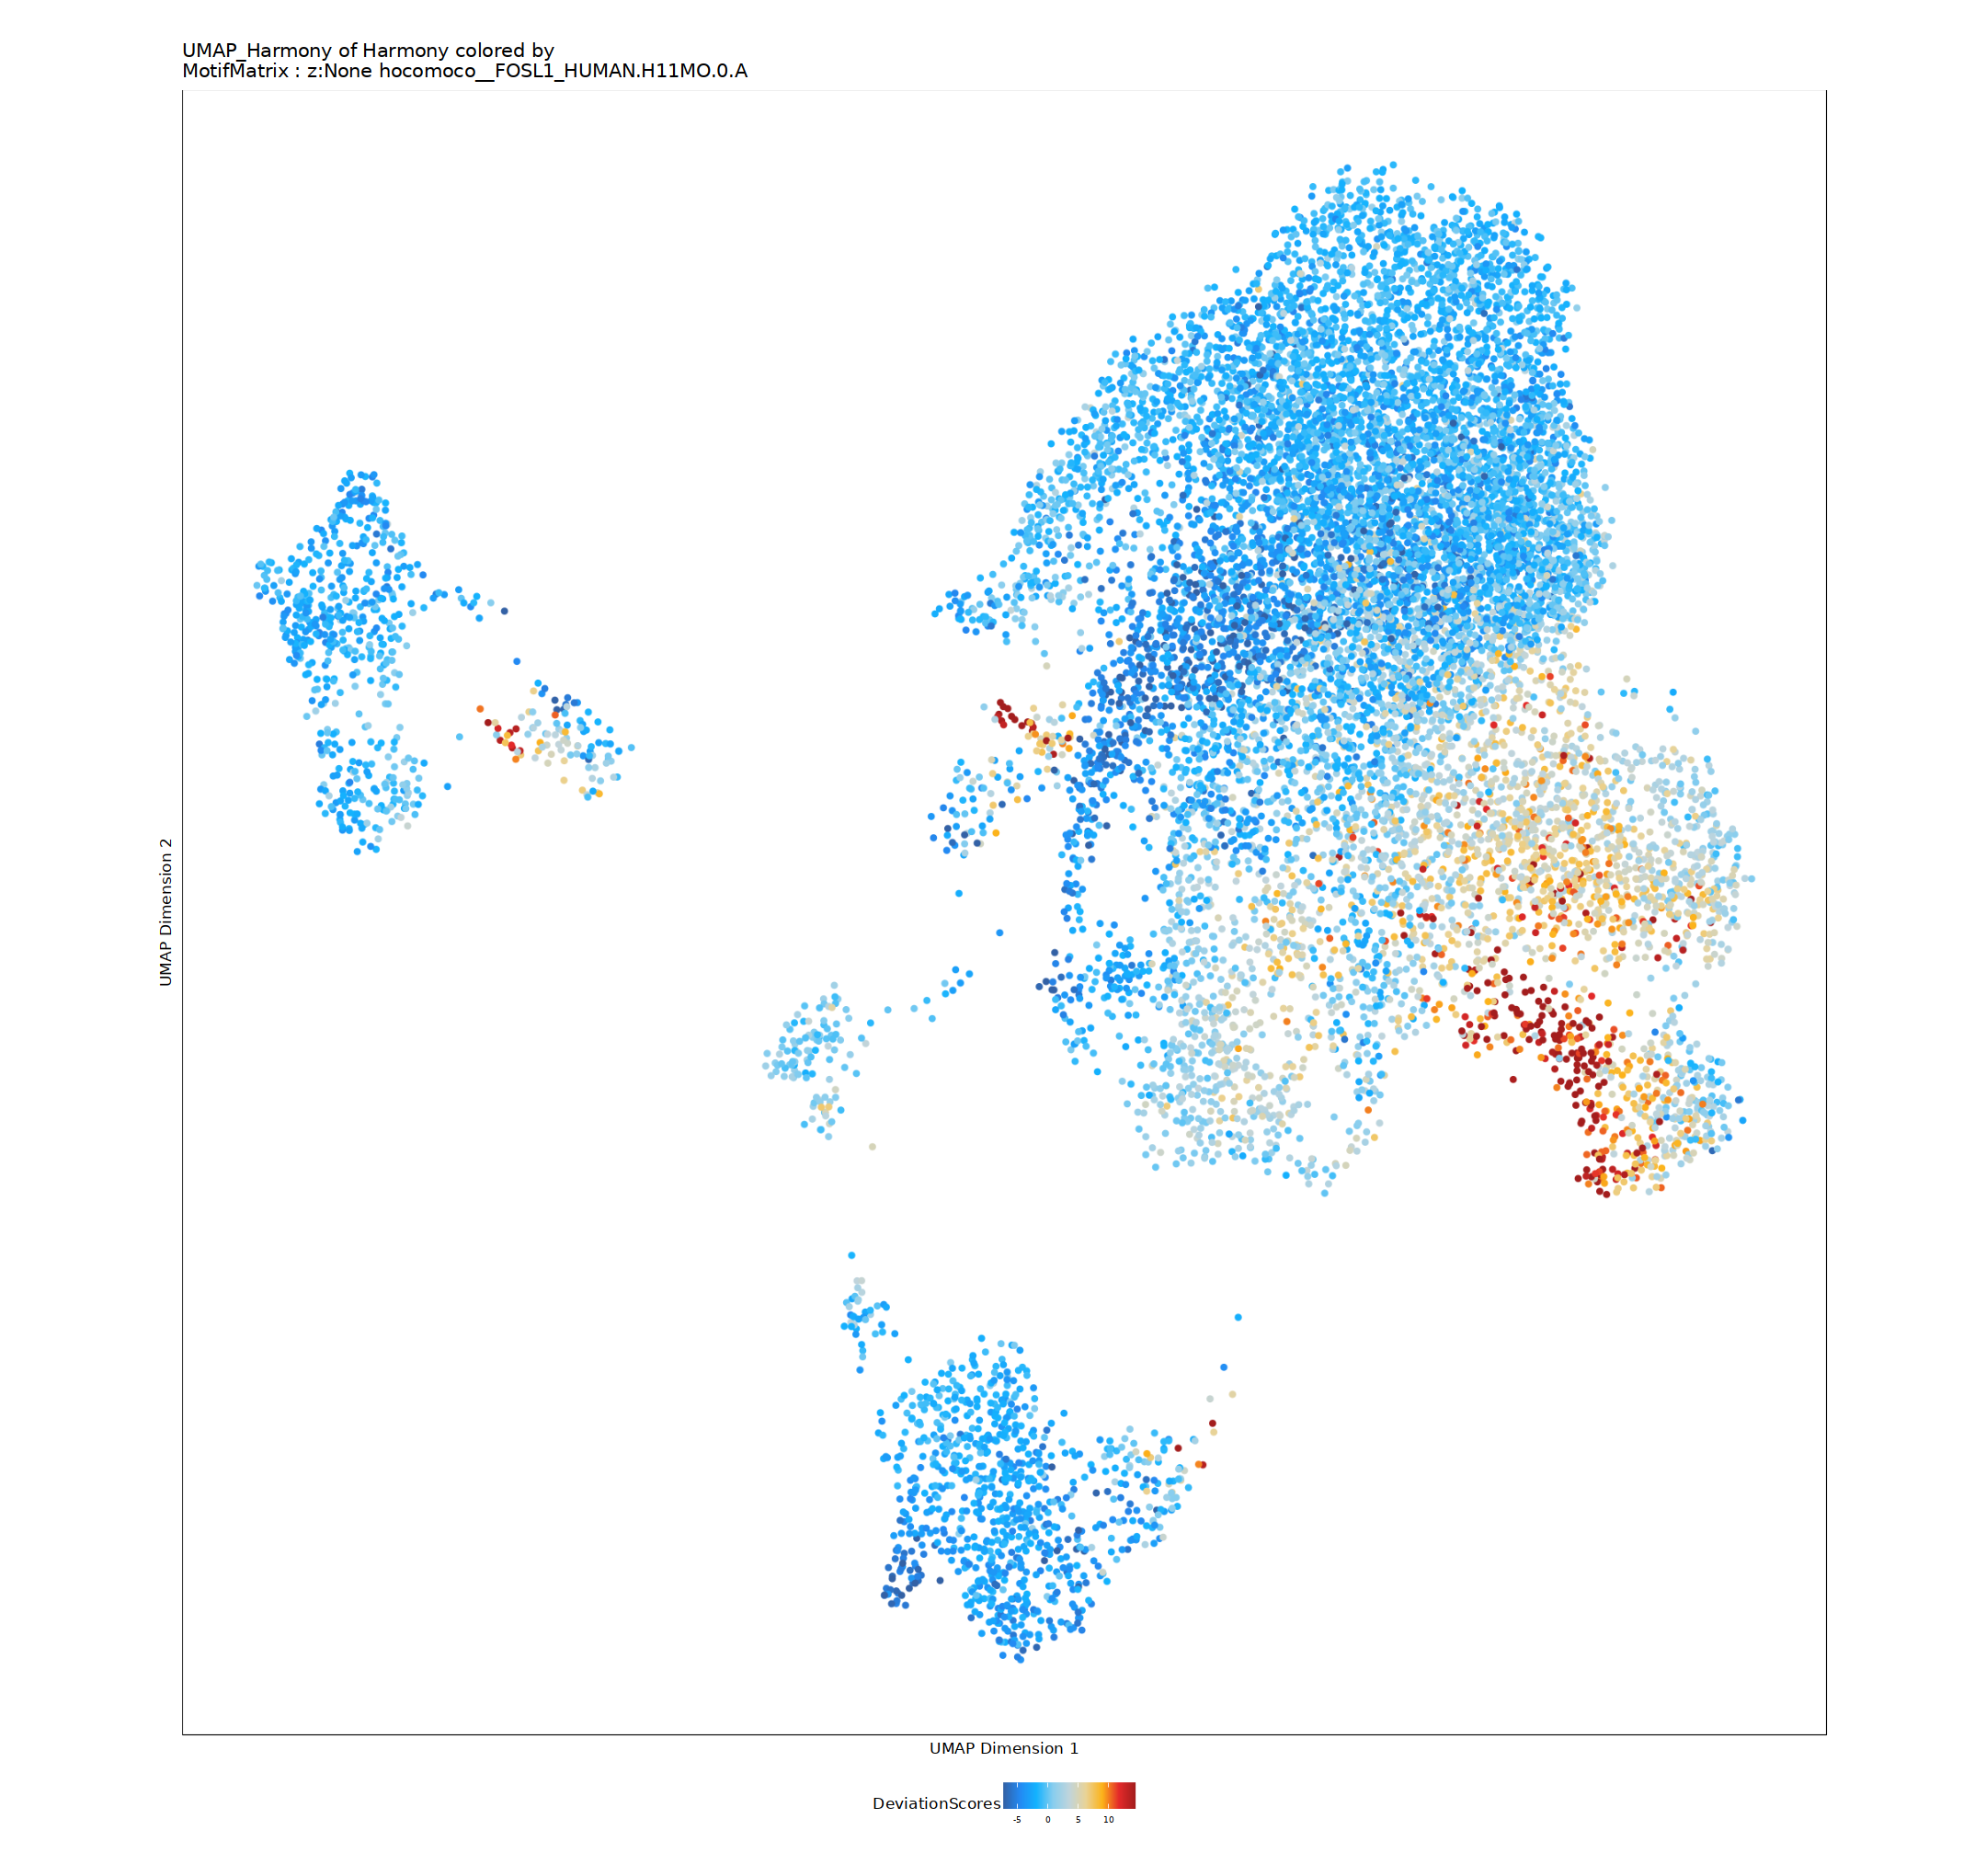

In [28]:
p4

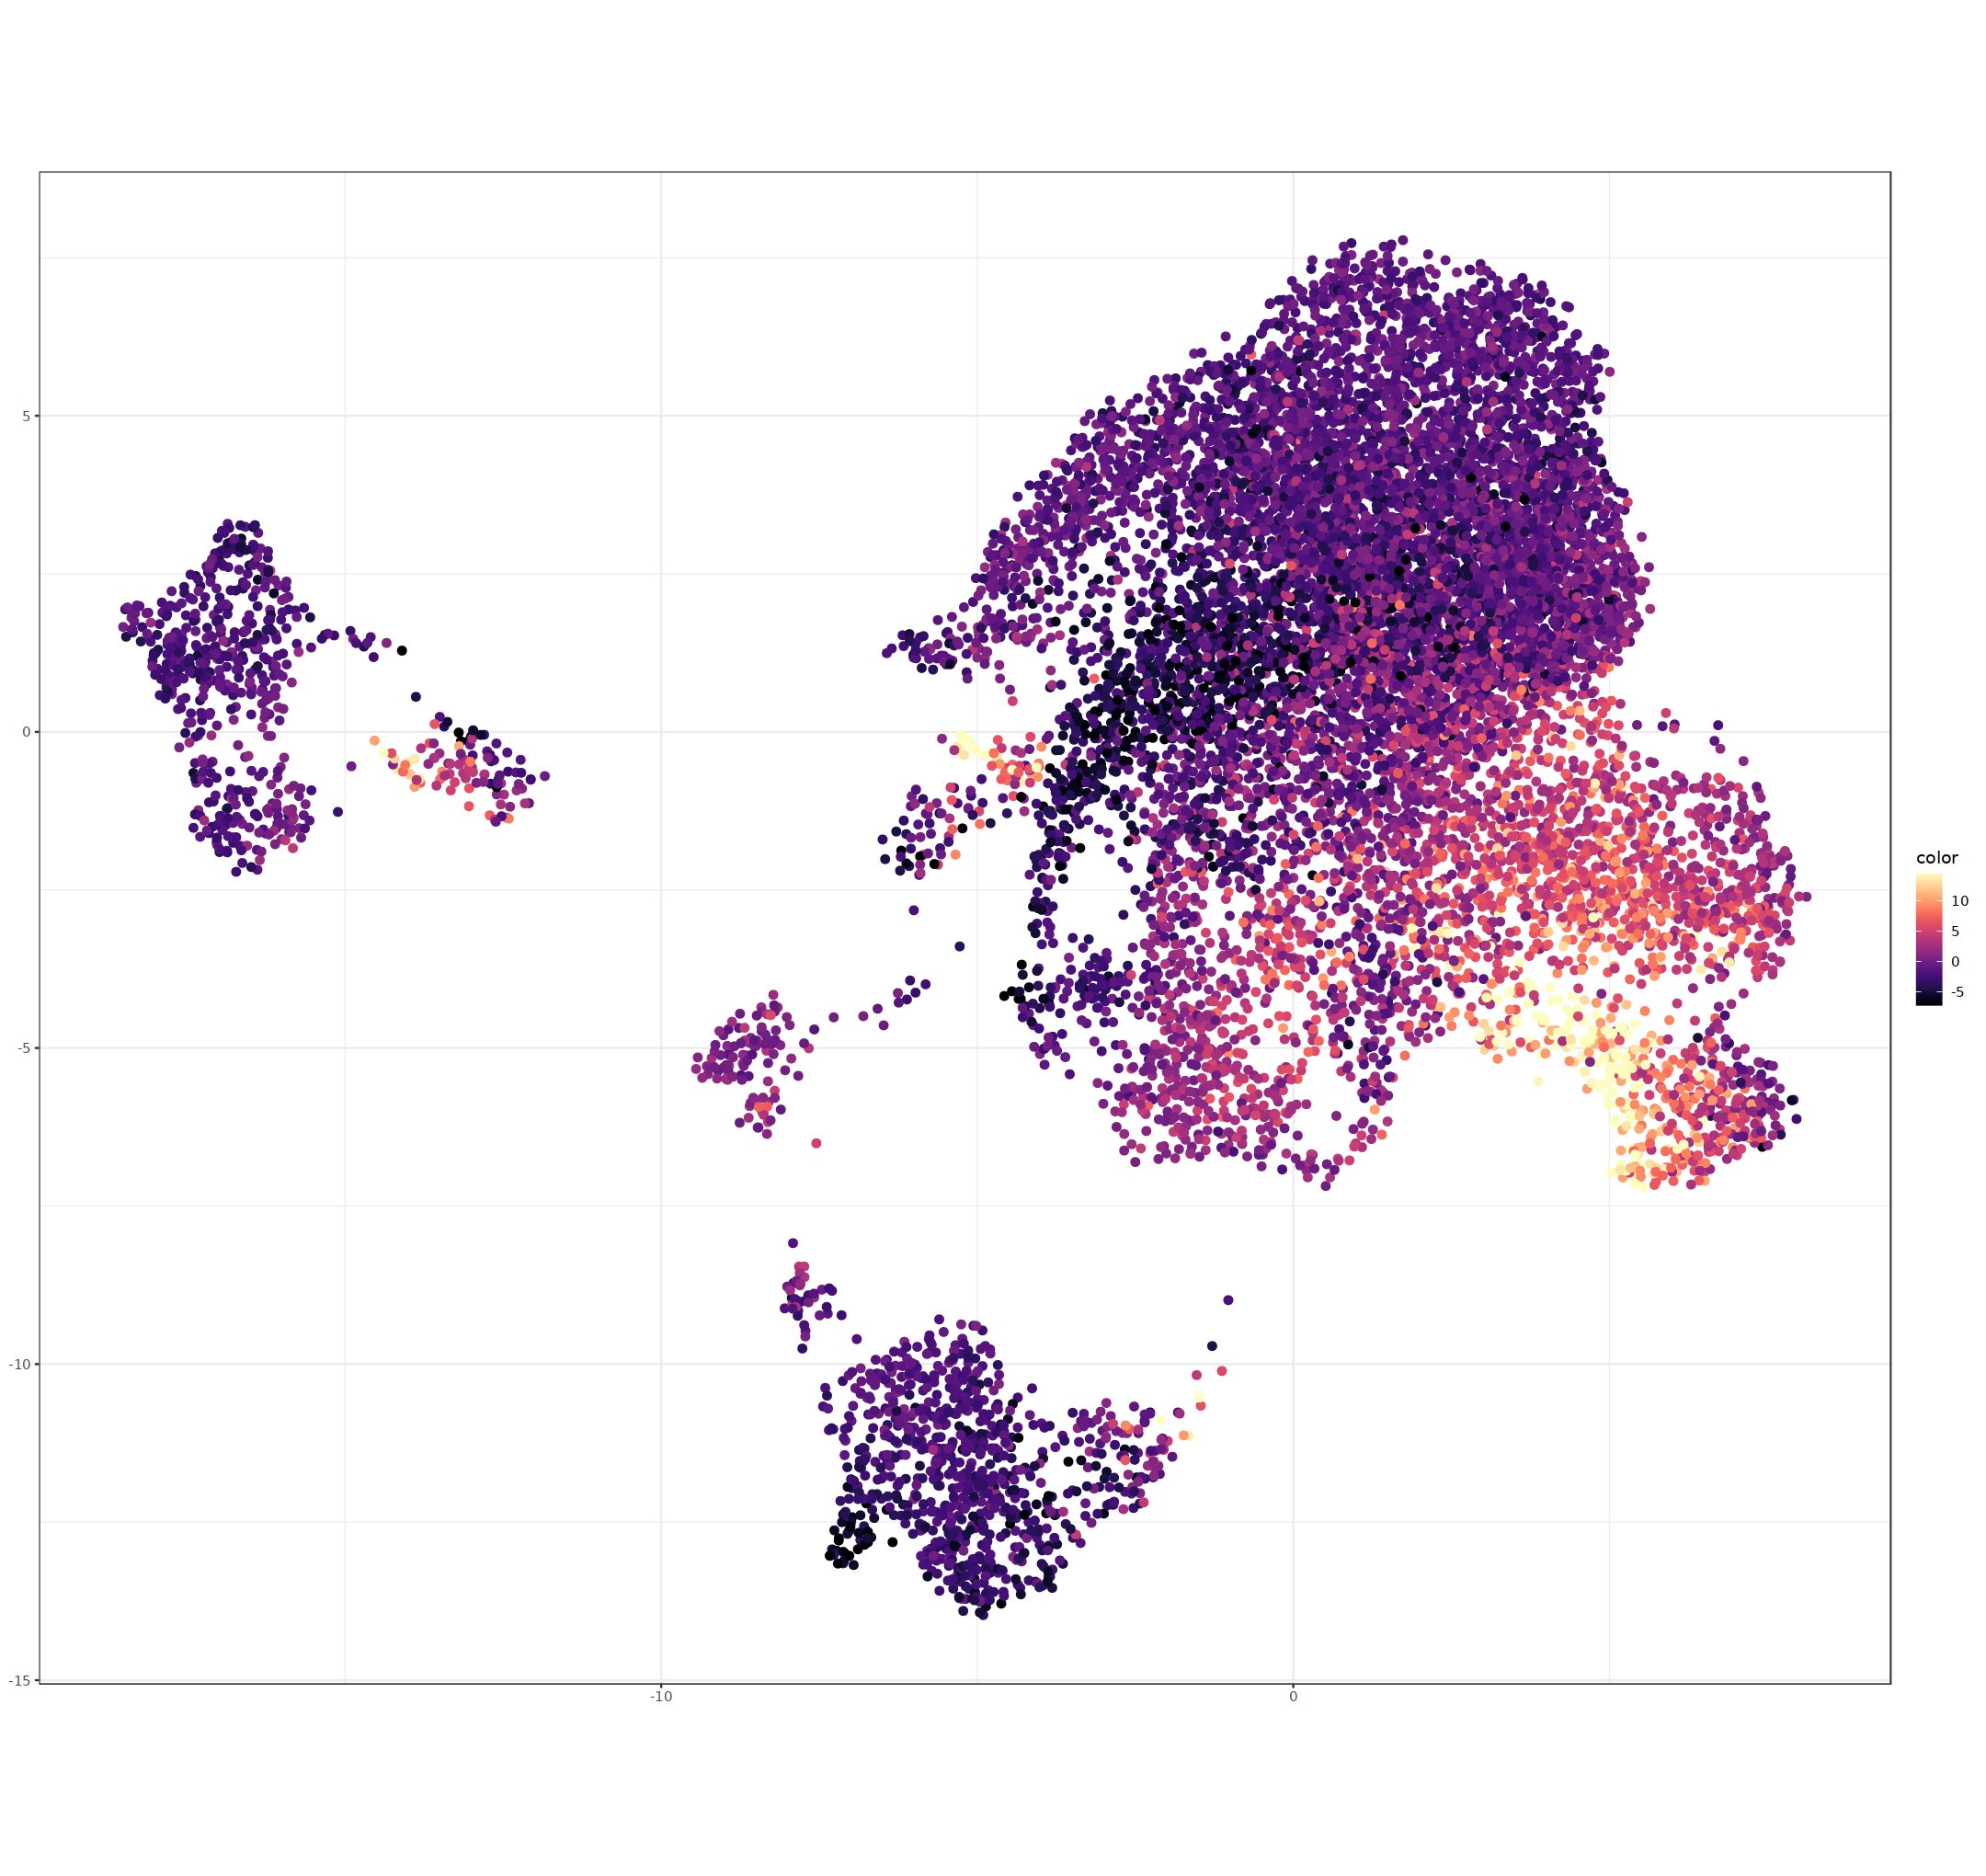

In [29]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = p4$data$x,
    UMAP_2 = p4$data$y,
    color = p4$data$color
  ) %>%
  group_by(color) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

plot_GATA <- p4$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  theme_bw() +
  #expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_viridis(option = "A") +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank()) +
  coord_fixed()

plot_GATA

In [33]:
motif <- t(read.table("/home/adufour/work/cistargetdb/singletons_v2/metacluster_137.2.cb", skip = 211, nrows = 12, header = FALSE, sep = "\t", dec = "."))

In [34]:
rownames(motif) <- c("A", "C", "G", "T")

In [35]:
motif_gata <- ggseqlogo( motif, method='custom', seq_type='dna', ncol=1 )

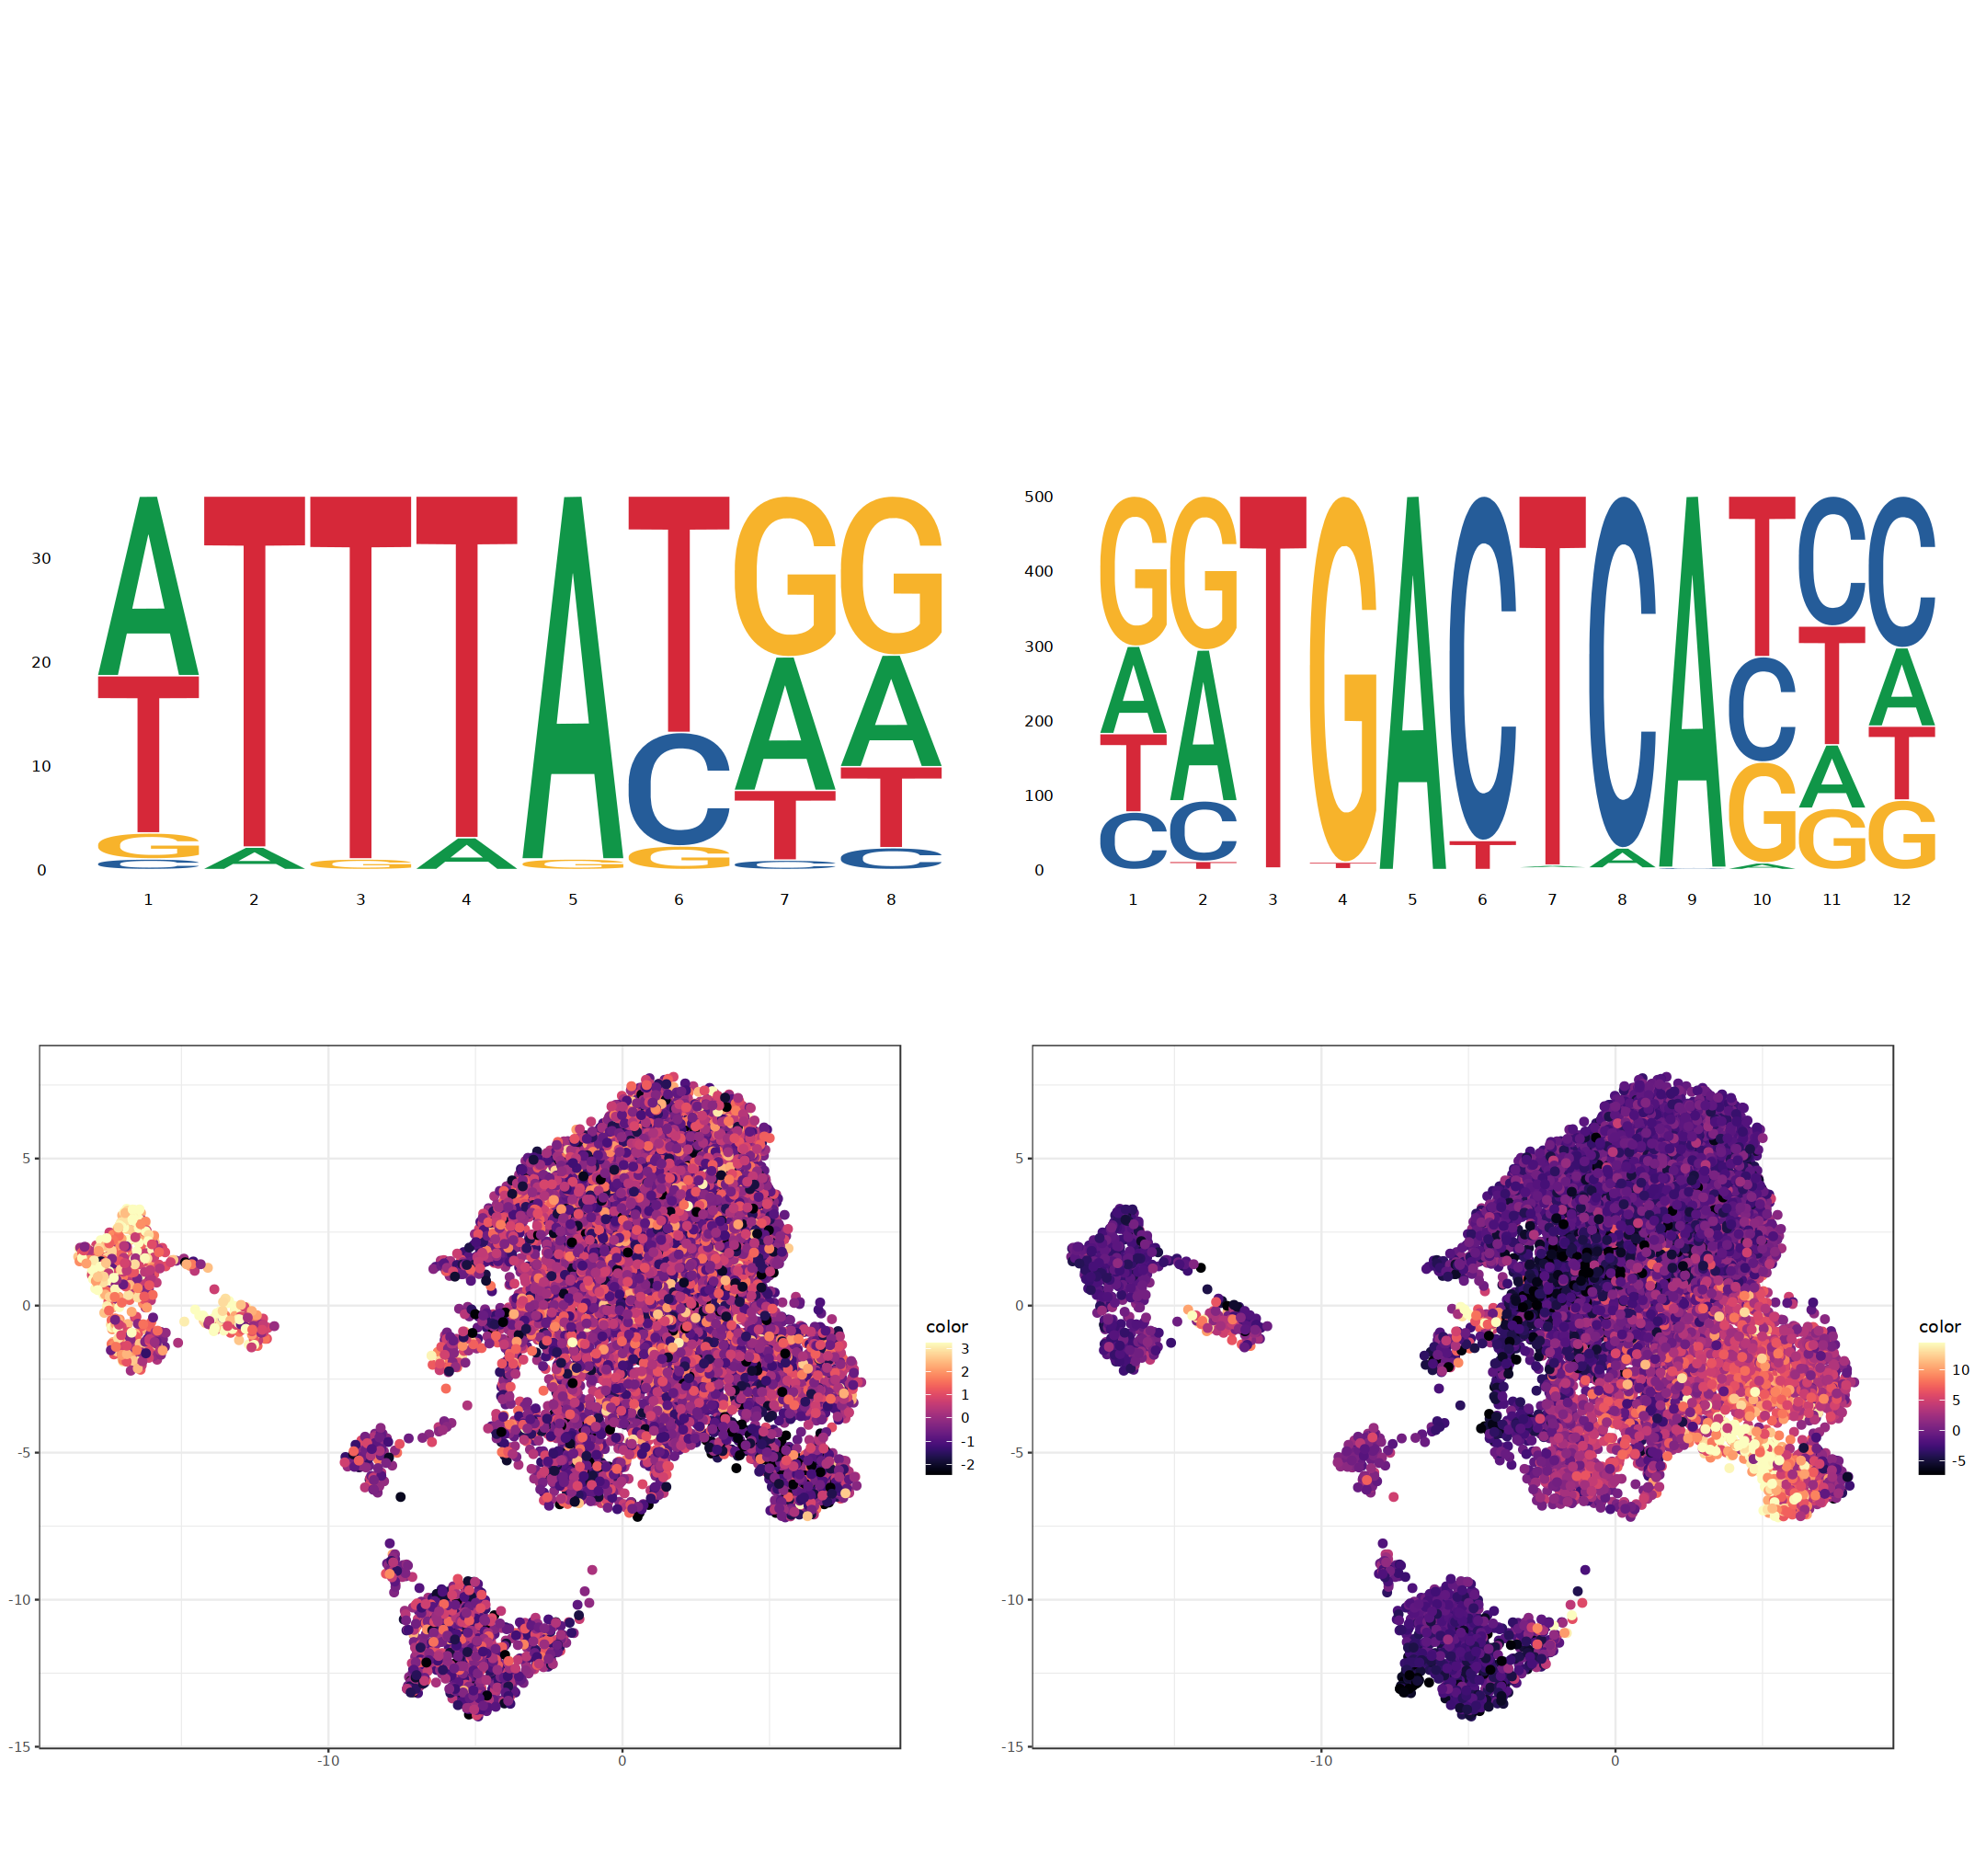

In [36]:
graph_final <- ggdraw() +
  draw_plot(nanog_logos, 0, .5, .5, .25) +
  draw_plot(motif_gata, .5, .5, .5, .25) +
  draw_plot(plot_nanog, 0, 0, .5, .5) +
  draw_plot(plot_GATA, .5, 0, .5, .5)# +
  #draw_plot_label(c("B", "C", "D", "E"), c(0, 0.5, 0, 0.5), c(1, 1, 0.5, 0.5), size = 20)
graph_final

In [37]:
ggsave("/home/adufour/work/notebook/plots/omics/motif/cdx2_fosl1.pdf", graph_final, width = 60, height = 40, units = "cm")